In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime

In [ ]:
data = pd.read_csv('swap_rates.csv')
data = data[['Start Date', 'EMA']]
data

In [ ]:
dummytrades = pd.read_csv('final_feature_results.csv')
dummytrades

In [ ]:
data.plot(y='EMA',x='Start Date', figsize=(15, 7))
plt.show()

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data['Start Date'], data['EMA'], label='EMA')
plt.axhline(0.0042,color='gray', label='lower bound')
#plt.hline(0.0379, datetime.date(2022,1,13), datetime.date(2031,11,24), linestyles='--', colors='gray', label='upper bound')
plt.show()

### Take Fourier transform

In [ ]:
EMA_fft = np.fft.fft(np.asarray(data['EMA'].tolist()))
fft_df = pd.DataFrame({'fft':EMA_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
#fft_df.sort_values(by=['abs'], ascending=False, inplace=True)
#fft_df.reset_index(inplace=True)
#fft_df.drop(columns=['index'], inplace=True)
fft_df.head(n=20)

In [ ]:
from collections import deque
items = deque(np.asarray(fft_df['absolute'].tolist()))
items.rotate(int(np.floor(len(fft_df)/2)))
plt.figure(figsize=(15, 7))
plt.stem(items)
plt.show()

### Reproducing the signal

In [ ]:
# take all components

plt.figure(figsize=(15, 7))
plt.plot(np.fft.ifft(np.asarray(fft_df['fft'].tolist())))
plt.show()

### Low-pass filtering

In [ ]:
# take only 200 components

fft_list = np.asarray(fft_df['fft'].tolist())
fft_list[100:-100] = 0

plt.figure(figsize=(15, 7))
plt.plot(np.fft.ifft(fft_list))
plt.show()

In [ ]:
# take only 100 components

fft_list = np.asarray(fft_df['fft'].tolist())
fft_list[50:-50] = 0

plt.figure(figsize=(15, 7))
plt.plot(np.fft.ifft(fft_list))
plt.show()

In [ ]:
# take only 20 components

fft_list = np.asarray(fft_df['fft'].tolist())
fft_list[10:-10] = 0

plt.figure(figsize=(15, 7))
plt.plot(np.fft.ifft(fft_list))
plt.show()

In [ ]:
# take only 10 components

fft_list = np.asarray(fft_df['fft'].tolist())
fft_list[5:-5] = 0

plt.figure(figsize=(15, 7))
plt.plot(np.fft.ifft(fft_list))
plt.show()

## Fast Fourier Transform

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
merged_data = pd.read_csv('merged_data2.csv')

In [64]:
len(merged_data)

3919104

In [65]:
merged_data.drop(['Trade Currency','maturity'], axis = 1)

,Value Date,Trade Name,Zero Rate Shock,TV,Expiry Bucket,Expiry Date,Tenor Bucket,Vega,underlying,pay_frequency,lower_bound,upper_bound
0,2022-09-02,dummyTrade1,-100,-227907.098775,1y,2023-09-04,10y,1.962246,USD: CMS:2Y,0.5,0.0042,0.0379
1,2022-09-02,dummyTrade1,-50,-222208.400967,1y,2023-09-04,10y,-3.812341,USD: CMS:2Y,0.5,0.0042,0.0379
2,2022-09-02,dummyTrade1,-25,-218960.927995,1y,2023-09-04,10y,4.471006,USD: CMS:2Y,0.5,0.0042,0.0379
3,2022-09-02,dummyTrade1,-10,-216872.430106,1y,2023-09-04,10y,4.333398,USD: CMS:2Y,0.5,0.0042,0.0379
4,2022-09-02,dummyTrade1,-5,-216146.310328,1y,2023-09-04,10y,5.679687,USD: CMS:2Y,0.5,0.0042,0.0379
...,...,...,...,...,...,...,...,...,...,...,...,...
3919099,2024-01-12,dummyTrade9,10,-547852.055930,15y,2039-01-12,8y,5.007952,USD: CMS:5Y,0.5,0.0044,0.0397
3919100,2024-01-12,dummyTrade9,25,-521228.587618,15y,2039-01-12,8y,5.131505,USD: CMS:5Y,0.5,0.0044,0.0397
3919101,2024-01-12,dummyTrade9,50,-464905.982097,15y,2039-01-12,8y,3.348622,USD: CMS:5Y,0.5,0.0044,0.0397
3919102,2024-01-12,dummyTrade9,75,-391315.041929,15y,2039-01-12,8y,1.063634,USD: CMS:5Y,0.5,0.0044,0.0397


In [ ]:
vega_values = merged_data['Vega'].values
vega_values

In [ ]:
# Apply Fourier Transform
fft_values = np.fft.fft(vega_values)
fft_values

In [66]:
# Get frequencies
frequencies = np.fft.fftfreq(len(vega_values))
frequencies

array([ 0.00000000e+00,  2.55160363e-07,  5.10320726e-07, ...,
       -7.65481090e-07, -5.10320726e-07, -2.55160363e-07])

In [60]:
# Keep only significant frequencies (e.g., filter out small amplitudes)
significant_fft_values = np.where(np.abs(fft_values) > 1e-5, fft_values, 0)

# Apply Inverse Fourier Transform
predicted_vega = np.fft.ifft(fft_values).real
predicted_vega 

array([ 1.96224604, -3.81234111,  4.47100553, ...,  3.34862196,
        1.06363422, -5.71580755])

In [61]:
# Compute accuracy metrics
mse = mean_squared_error(vega_values, predicted_vega)
mae = mean_absolute_error(vega_values, predicted_vega)
r2 = r2_score(vega_values, predicted_vega)

In [63]:
mse

1.944866994038689e-24

In [62]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0000
R-squared (R²): 1.0000


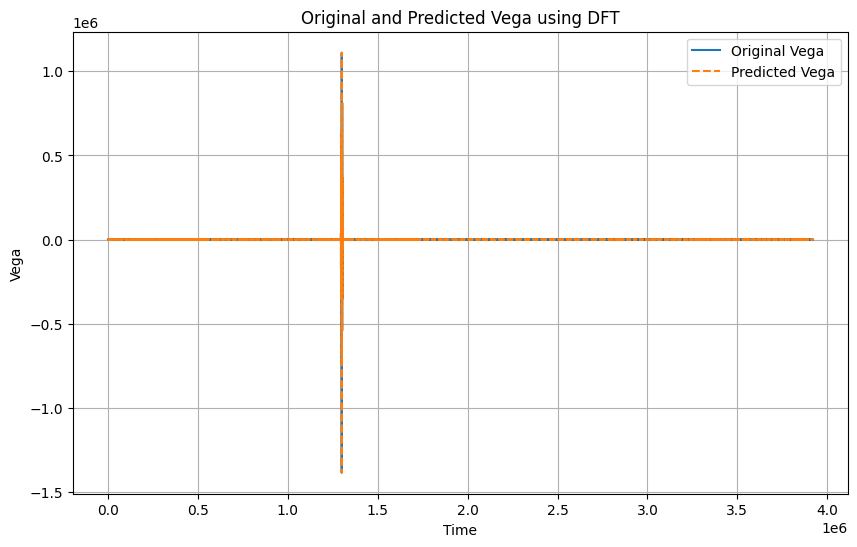

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(vega_values, label='Original Vega')
plt.plot(predicted_vega, label='Predicted Vega', linestyle='--')
plt.title('Original and Predicted Vega using DFT')
plt.xlabel('Time')
plt.ylabel('Vega')
plt.legend()
plt.grid()
plt.show()

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequentials
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
# Split the data into training and testing sets
train_vega, test_vega = train_test_split(vega_values, test_size=0.3, random_state=42)

In [70]:
# Apply Fourier Transform on the training set
fft_values = np.fft.fft(train_vega)

In [72]:
# Get frequencies corresponding to the FFT values
frequencies = np.fft.fftfreq(len(train_vega))

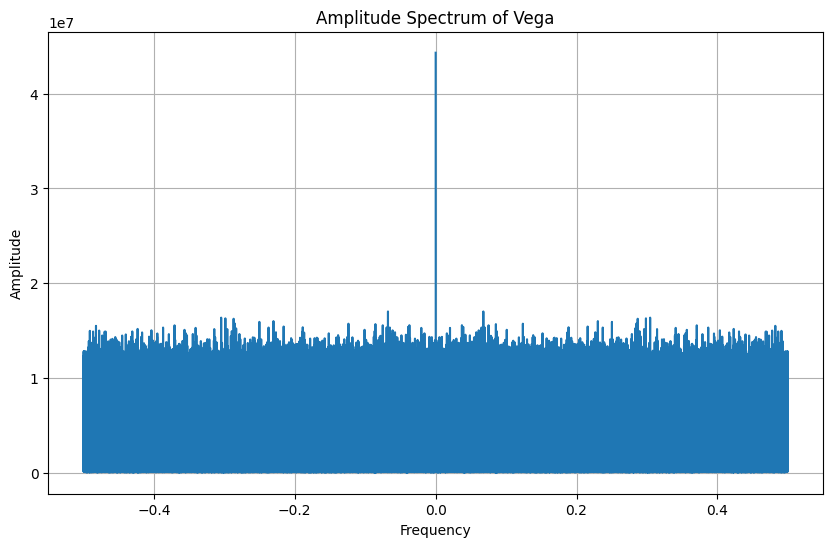

In [73]:
# Plot the amplitude spectrum to visualize significant frequencies
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(fft_values))
plt.title('Amplitude Spectrum of Vega')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [74]:
# Keep only significant frequencies (e.g., filter out small amplitudes)
significant_fft_values = np.where(np.abs(fft_values) > 1e-5, fft_values, 0)

In [75]:
# Apply Inverse Fourier Transform and take the real part
predicted_train_vega = np.fft.ifft(significant_fft_values).real

In [76]:
# Predict on test set using the significant frequencies
test_fft_values = np.fft.fft(test_vega)
significant_test_fft_values = np.where(np.abs(test_fft_values) > 1e-5, test_fft_values, 0)
predicted_test_vega = np.fft.ifft(significant_test_fft_values).real

In [77]:
# Compute accuracy metrics on the test set
mse = mean_squared_error(test_vega, predicted_test_vega)
mae = mean_absolute_error(test_vega, predicted_test_vega)
r2 = r2_score(test_vega, predicted_test_vega)

In [78]:
# Print accuracy metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0000
R-squared (R²): 1.0000


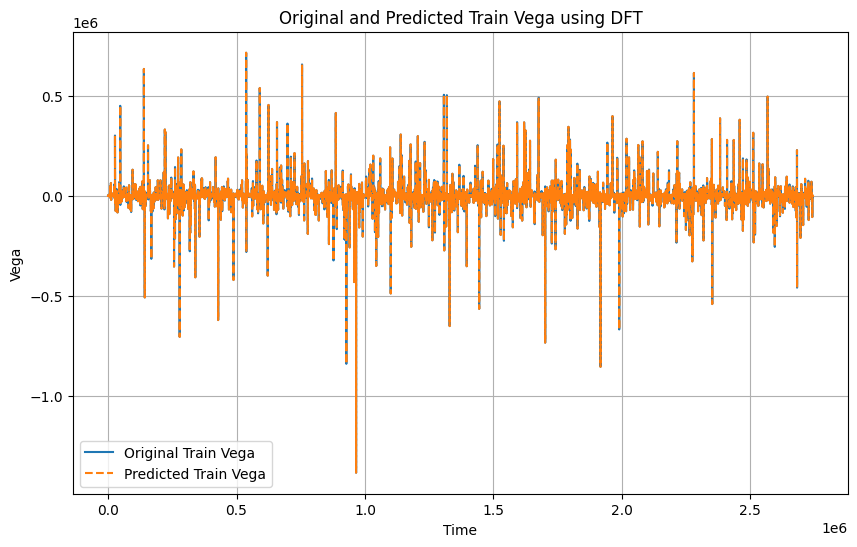

In [79]:
# Plot the original and predicted values for the training set
plt.figure(figsize=(10, 6))
plt.plot(train_vega, label='Original Train Vega')
plt.plot(predicted_train_vega, label='Predicted Train Vega', linestyle='--')
plt.title('Original and Predicted Train Vega using DFT')
plt.xlabel('Time')
plt.ylabel('Vega')
plt.legend()
plt.grid()
plt.show()

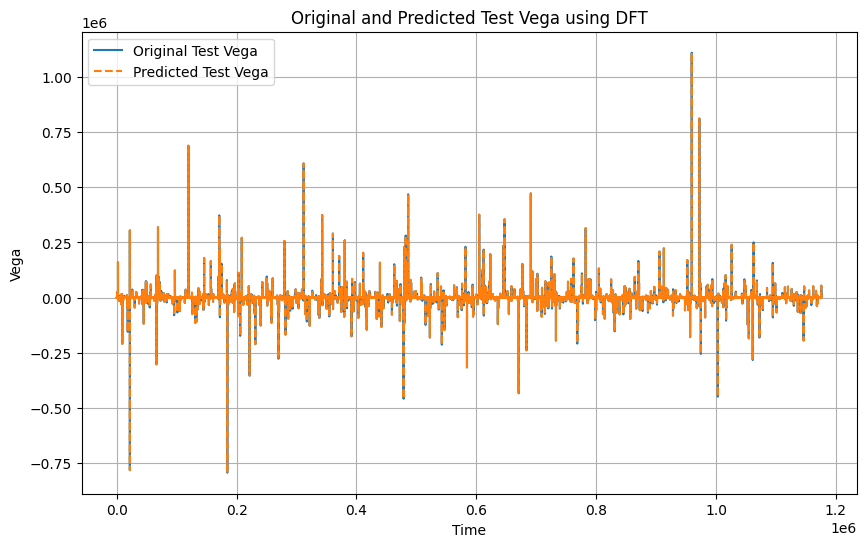

In [81]:
# Plot the original and predicted values for the test set
plt.figure(figsize=(10, 6))
plt.plot(test_vega, label='Original Test Vega')
plt.plot(predicted_test_vega, label='Predicted Test Vega', linestyle='--')
plt.title('Original and Predicted Test Vega using DFT')
plt.xlabel('Time')
plt.ylabel('Vega')
plt.legend()
plt.grid()
plt.show()